In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix




In [5]:
pwd

'C:\\Users\\matth'

In [6]:
re=pd.read_csv('C:\\Users\\matth\\Downloads\\Real estate (2).csv')

In [7]:
re.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [8]:
re.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [9]:
re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [14]:
for value in re:
    print('For {},{} unique values present'.format(value,re[value].nunique()))

For No,414 unique values present
For X1 transaction date,12 unique values present
For X2 house age,236 unique values present
For X3 distance to the nearest MRT station,259 unique values present
For X4 number of convenience stores,11 unique values present
For X5 latitude,234 unique values present
For X6 longitude,232 unique values present
For Y house price of unit area,270 unique values present


<AxesSubplot:>

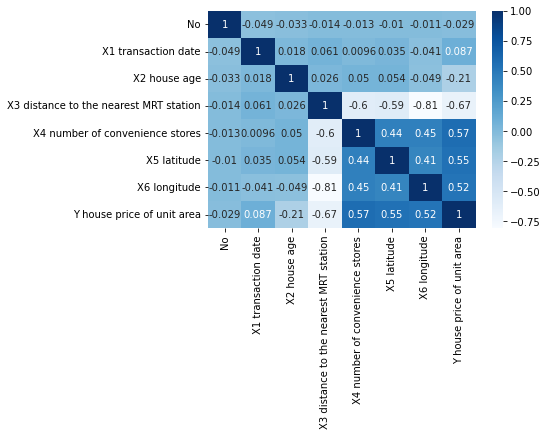

In [15]:
sns.heatmap(re.corr(), annot=True,cmap='Blues')

In [17]:
X = re.iloc[:,1:].values
y = re.iloc[:,0].values

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

Decision Tree

In [19]:
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

Random Forest Regression Model

In [20]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

Calculate Model Score
Let's calculate the model score to understand how our model performed along with the explained variance score.

In [22]:

print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))

#Let's have a tabular pandas data frame, for a clear comparison

models_score =pd.DataFrame({'Model':['Decision Tree','Random forest Regression'],
                            'Score':[decision_score,rf_score],
                            'Explained Variance Score':[expl_tr,expl_rf]
                           })
models_score.sort_values(by='Score',ascending=False)

Decision tree  Regression Model Score is  -102
Random Forest Regression Model Score is  -18


,Model,Score,Explained Variance Score
1,Random forest Regression,-0.177707,-6.261634
0,Decision Tree,-1.017924,-1.045936


random forest accuracy is 18% and also expalined variance score is 6.26 . So Random Forest is a suitable model for predicting the price of the house.